In [33]:
# Import libraries
import numpy as np


# Define the density function first
def rho(x,y):
    """Generates the value of rho at coordinate (x,y)

    Args:
        x (float): x coordinate
        y (float): y coordinate

    Returns:
        float: the density at (x,y)
    """
    return (2*y**2 + 1)*(np.sin((4*np.pi*x)/3)+2)

# Part 1
def int_rect(rho,xlim,ylim,part = 50):
    """ Calculate the mass of a rectangle with variable density rho(x,y)

    Args:
        rho (function): density function of the rectangle
        xlim (tuple): tuple containing (xa,xb)
        ylim (tuple): tuple containing (ya,yb)
        part (int, optional): number of partition. Defaults to 50.

    Returns:
        float: the mass of the rectangle
    """
    # extract the value xa,xb,ya,yb
    xa,xb = xlim
    ya,yb = ylim

    # determine hx and hy, the steps in x and y direction
    hx = (xb - xa)/part
    hy = (yb - ya)/part

    # initiate mass
    mass = 0.0

    # Loops, integrating the area
    for i in range(part):
        for j in range(part):
            coor_x = xa+(1/2)*hx+i*hx # generalized midpoint method
            coor_y = ya+(1/2)*hy+j*hy # for both x and y
            mass += rho(coor_x,coor_y)*hx*hy # density times area

    return mass

# output: The mass of the plate is:  43.99919999999981, close to 44 kg
print("The mass of the plate is: ", int_rect(rho,(0,3),(0,2),part = 100))



# Part 2
# We will modify the previous code
def int_triangles(rho,xlim,ylim,part = 50):
    """calculate the mass of the lower and upper triangle in a rectangle with variable density, where there's a line bisecting the triangle from (xa,ya) to (xb,yb)

    Args:
        rho (function): density function of the rectangle
        xlim (tuple): tuple containing (xa,xb)
        ylim (tuple): tuple containing (ya,yb)
        part (int, optional): number of partition. Defaults to 50.

    Returns:
        float: the mass of the lower triangle [(xa,ya),(xb,ya),(xb,yb)]
        float: the mass of the upper triangle [(xa,ya),(xa,yb),(xb,yb)]
    """
    # extract the value xa,xb,ya,yb
    xa,xb = xlim
    ya,yb = ylim

    # determine hx and hy, the steps in x and y direction
    hx = (xb - xa)/part
    hy = (yb - ya)/part

    # calculate the parameters for the line y = mx + c going through (xb,yb) and (xa,ya)
    m = (yb - ya)/(xb - xa)
    c = (ya*xb - xa*yb)/(xb - xa)

    # initiate mass
    mass1 = 0.0
    mass2 = 0.0
    

    # Loops, integrating the area
    for i in range(part):
        for j in range(part):
            coor_x = xa+(1/2)*hx+i*hx # generalized midpoint method
            coor_y = ya+(1/2)*hy+j*hy # for both x and y

            # decide whether to add the mass to the lower or upper triangle
            if coor_y < (m*coor_x +c): # lower triangle
                mass1 += rho(coor_x,coor_y)*hx*hy # density times area
            elif coor_y > (m*coor_x +c): # upper triangle
                mass2 += rho(coor_x,coor_y)*hx*hy
            else: # the mass lies on the line, hence it's divided between the triangles
                mass1 += (0.5)*rho(coor_x,coor_y)*hx*hy
                mass2 += (0.5)*rho(coor_x,coor_y)*hx*hy

    return mass1, mass2

mass1, mass2 = int_triangles(rho,(0,3),(0,2),part = 100)

# output: lower triangle mass: 12.17439851274582, upper triangle mass: 31.8248014872542
# output: total mass = 43.999200000000016
print("lower triangle mass: {}, upper triangle mass: {}\ntotal mass = {}".format(mass1,mass2, mass1+mass2))




The mass of the plate is:  43.99919999999981
lower triangle mass: 12.17439851274582, upper triangle mass: 31.8248014872542
total mass = 43.999200000000016


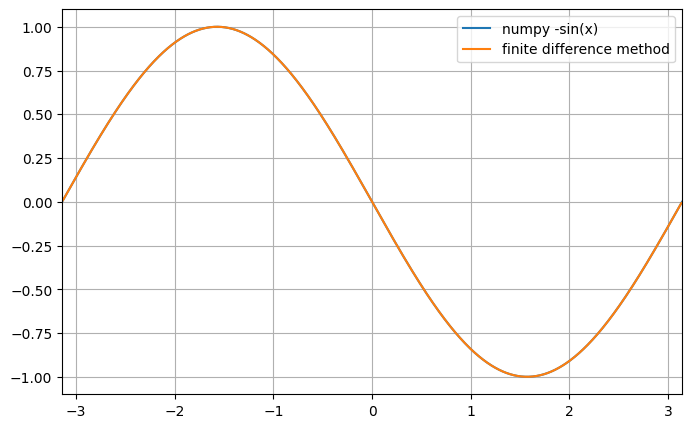

In [80]:
# Here, we want to calculate the second derivative of a function given a list of array y

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# define x array and dx
xarr, dx = np.linspace(-np.pi,np.pi,1000,retstep= True)

# define y array
yarr = np.sin(xarr)

def second_derivative(yarr,dx):
    """ This is a function that gives the second derivative of a uniformly distributed array y

    Args:
        yarr (np.array): uniformly distributed array y
        dx (float): the x difference between data points

    Returns:
        np.array: an array containing the second derivative of the y array
    """
    
    # create an array to store the second derivative of y
    ddyarr = np.zeros_like(yarr)

    # Treat the center first
    for i in range(1,len(ddyarr)-1):
        ddyarr[i] = (yarr[i-1] - 2*yarr[i] + yarr[i+1])/(dx**2)

    # treat the first points using forward difference
    ddyarr[0] = (1/dx**2)*(yarr[2] - 2*yarr[1] + yarr[0])

    # treat the last point using backward difference
    ddyarr[-1] = (1/dx**2)*(yarr[-1] - 2*yarr[-2] + yarr[-3])
    
    return ddyarr

# get the value
ddyarr = second_derivative(yarr,dx)
#print("This is the result for the second derivative: ", ddyarr)

# quantify the error
error = (ddyarr.copy()-(-np.sin(xarr)))
#print("This is the error array: ",error)

# from here, we can see that the errors of the center points are about 1e-8, while the error of the edge cases are about 1e-3. The accuracy of the derivative drops on the edge cases

# plot the values
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(xarr, -np.sin(xarr), label = "numpy -sin(x)")
ax.plot(xarr, ddyarr, label = "finite difference method")
ax.legend()
ax.set_xlim((-np.pi,np.pi))
ax.grid(True)
plt.show()

    

In [86]:
# Integration using Simpsons 3/8 rule.

# Import libraries
import numpy as np
from scipy.integrate import quad

def simps38(f, xlim, N):
    """ integration using Simpson's 3/8 rule

    Args:
        f (function): function that we want to integrate
        xlim (tuple): tuple containing the limit of the integration (xa,xb)
        N (int): number of nodes, must be in form of 4+i*3, where i is a positive integer

    Raises:
        Exception: If N does not comply with the condition

    Returns:
        float: the result of the integration 
    """

    iter = 0
    # Check if the number of node is right and how many times the iteration should be done
    if N == 4:
        iter = 1 # 1-time process
    elif (N-4)%3 == 0:
        iter = int((N-4)/3) + 1 # extra iteration, ex. N = 10 means 3 iterations
    else:
        raise Exception('N should be 4 or 4+i*3, where i is a positive integer')
    
    # create an array for x, and get the value of h
    xarr, h = np.linspace(xlim[0],xlim[1], N, retstep=True)

    # initialize summation
    integral = 0.0

    # iteration for calculating the integral
    for i in range(iter):
        j = i*3 # multiply the index by 3 because we are using Simpson's 3/8 rule
        integral += (h/8)*(3*f(xarr[j]) + 9*f(xarr[j+1]) + 9*f(xarr[j+2]) + 3*f(xarr[j+3])) # Simpson's 3/8 rule

    return integral


# Integrate sin x from 0 to pi
f = lambda x: np.sin(x)
xlim = (0,np.pi)
result_simps = simps38(f,xlim,13)
result_scipy = quad(f,xlim[0],xlim[1])

print("Result from Simpson 3/8: ", result_simps)
print("Result from SciPy: ", result_scipy[0])

# Finding the number of nodes N where the relative error is less than 1e-4
def find_node_simpson(f, f_simp, xlim, tol = 1e-4, max_iter = 100):
    """ Finding the number of nodes needed to reduce the error below the tolerance

    Args:
        f (function): the function that we want to integrate
        f_simp (function): the simpson function that we made
        xlim (tuple): the limits of integration (xa, xb)
        tol (float, optional): the error tolerance that we want to achieve. Defaults to 1e-4.
        max_iter (int, optional): the maximum number of iteration. Defaults to 100.

    Returns:
        float: the minimum number of node needed to reduce the error below the tolerance
    """
    
    for i in range(max_iter):
        N = 4 + 3*i # the number of nodes
        eta = np.abs(1-(f_simp(f,xlim,N)/quad(f,xlim[0],xlim[1])[0])) # the relative error
        if eta < tol: # if the relative error is less than the tolerance
            return N, eta
    
# Find the minimum number of node
N_min, eta_min = find_node_simpson(f, simps38, xlim)
print("The minimum number of nodes to get the error under 1e-4 is: ", N_min)
print("The relative error in this case is: ", eta_min)
    
# calculate the relative error between fysa1130.trapezoidal and scipy quad using N = 13

# trapezoidal function from fysa1130
def trapezoidal(func, imin, imax, N):
    '''
    Integrate by using trapezoidal rule

    Parameters
    ----------
    func : function
        function which will be integrated
    imin : float
        lower integration limit
    imax : float
        upper integration limit
    N : int
        number of points where function is evaluated

    Returns
    -------
    myval : float
        value of the integral
    '''
    # weights or coefficients
    weight = 2*np.ones(N)
    weight[0] = 1
    weight[-1] = 1

    X, h = np.linspace(imin, imax, N, retstep=True)
    myvals = np.array(func(X))
    myval = (h/2)*np.dot(weight, myvals)

    return myval

print("Using N = 13 for the trapezoidal function, the relative error is: ", np.abs(1-(trapezoidal(f,xlim[0],xlim[1],N =13)/quad(f,xlim[0],xlim[1])[0])))

print("Using the same number of node, the simpson 3/8 rule gives a much better result")




Result from Simpson 3/8:  2.0001193864152254
Result from SciPy:  2.0
The minimum number of nodes to get the error under 1e-4 is:  13
The relative error in this case is:  5.96932076126766e-05
Using N = 13 for the trapezoidal function, the relative error is:  0.0057181117078421995
Using the same number of node, the simpson 3/8 rule gives a much better result


In [99]:
arr = np.linspace(0,100,101)
print(arr[1:6:3])
print(arr[1])

[1. 4.]
1.0


: 